In [1]:
pwd

'D:\\대학\\3-2\\IT집중교육1'

In [2]:
cd Project1

D:\대학\3-2\IT집중교육1\Project1


In [3]:
import json
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
with open ('AllSoleRankDict.json', "r", encoding='utf-8') as f:
    dataDict = json.load(f)

In [5]:
allDataDF = pd.DataFrame.from_dict(dataDict).transpose()
allDataDF

,wp1_champion,wp1_spell1,wp1_spell2,wp1_rune1,wp1_rune2,wp1_user name,wp1_kill,wp1_death,wp1_assist,wp1_kill participation,...,lp5_ward removed,lp5_total cs,lp5_cs per minute,lp5_item1,lp5_item2,lp5_item3,lp5_item4,lp5_item5,lp5_item6,lp5_item7
0,fiora,순간이동,점멸,정복자,결의,죽림초,16,4,3,54%,...,17,24,0.9,얼음 정수의 파편,슈렐리아의 군가,제어 와드,망각의 구,밴들유리 거울,명석함의 아이오니아 장화,예언자의 렌즈
1,irelia,순간이동,점멸,정복자,영감,제발그만해이놈아,3,5,2,18%,...,6,22,1.1,제국의 명령,명석함의 아이오니아 장화,검은 안개 낫,처형인의 대검,예언자의 렌즈,NaN,NaN
2,sejuani,순간이동,점멸,착취의 손아귀,영감,차돌이슈,5,1,8,52%,...,6,23,1.1,마법공학 교류 발전기,얼음 정수의 파편,충전형 물약,망각의 구,약간 신비한 신발,방출의 마법봉,예언자의 렌즈
3,sejuani,순간이동,점멸,착취의 손아귀,영감,남자는 와인이다,1,3,1,50%,...,5,5,0.3,얼음 정수의 파편,슈렐리아의 군가,망각의 구,밴들유리 거울,제어 와드,예언자의 렌즈,NaN
4,darius,유체화,점멸,정복자,결의,전소연baby,1,6,0,25%,...,3,22,1.4,신속의 장화,룬 강철 어깨 갑옷,점화석,밴들유리 거울,사파이어 수정,예언자의 렌즈,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61624,darius,유체화,점멸,치명적 속도,결의,iIeona,7,3,6,37%,...,2,36,1.3,타곤 산의 방벽,망가진 초시계,제어 와드,저녁갑주,증폭의 고서,명석함의 아이오니아 장화,예언자의 렌즈
61625,ornn,순간이동,점멸,봉인 풀린 주문서,결의,BLACKSMITHKING,2,0,6,35%,...,2,11,0.5,얼음 정수의 파편,증폭의 고서,증폭의 고서,불타는 향로,장화,금지된 우상,예언자의 렌즈
61626,tryndamere,유체화,점멸,치명적 속도,결의,kfo,3,3,3,27%,...,5,8,0.3,화학공학 부패기,슈렐리아의 군가,얼음 정수의 파편,증폭의 고서,예언자의 렌즈,NaN,NaN
61627,gragas,순간이동,점멸,선제공격,마법,킹누 역몽,5,4,6,26%,...,2,18,0.9,라일라이의 수정홀,존야의 모래시계,장화,얼음 정수의 파편,예언자의 렌즈,NaN,NaN


In [6]:
listForClust = []
for i in range(5):
    listForClust.append('wp' + str(i + 1) + '_' + 'kill')
    listForClust.append('wp' + str(i + 1) + '_' + 'death')
    listForClust.append('wp' + str(i + 1) + '_' + 'assist')
    listForClust.append('wp' + str(i + 1) + '_' + 'kill participation')
    listForClust.append('wp' + str(i + 1) + '_' + 'kda')
    listForClust.append('wp' + str(i + 1) + '_' + 'damage dealt')
    listForClust.append('wp' + str(i + 1) + '_' + 'damage taken')
    listForClust.append('wp' + str(i + 1) + '_' + 'control ward')
    listForClust.append('wp' + str(i + 1) + '_' + 'warding')
    listForClust.append('wp' + str(i + 1) + '_' + 'ward removed')
    listForClust.append('wp' + str(i + 1) + '_' + 'total cs')
    listForClust.append('wp' + str(i + 1) + '_' + 'cs per minute')
    
for i in range(5):
    listForClust.append('lp' + str(i + 1) + '_' + 'kill')
    listForClust.append('lp' + str(i + 1) + '_' + 'death')
    listForClust.append('lp' + str(i + 1) + '_' + 'assist')
    listForClust.append('lp' + str(i + 1) + '_' + 'kill participation')
    listForClust.append('lp' + str(i + 1) + '_' + 'kda')
    listForClust.append('lp' + str(i + 1) + '_' + 'damage dealt')
    listForClust.append('lp' + str(i + 1) + '_' + 'damage taken')
    listForClust.append('lp' + str(i + 1) + '_' + 'control ward')
    listForClust.append('lp' + str(i + 1) + '_' + 'warding')
    listForClust.append('lp' + str(i + 1) + '_' + 'ward removed')
    listForClust.append('lp' + str(i + 1) + '_' + 'total cs')
    listForClust.append('lp' + str(i + 1) + '_' + 'cs per minute')

In [7]:
listForChamp = []
for i in range(5):
    listForChamp.append('wp' + str(i + 1) + '_' + 'champion')
for i in range(5):
    listForChamp.append('lp' + str(i + 1) + '_' + 'champion')

In [8]:
dfForChamp = allDataDF[listForChamp]
dfForChamp

,wp1_champion,wp2_champion,wp3_champion,wp4_champion,wp5_champion,lp1_champion,lp2_champion,lp3_champion,lp4_champion,lp5_champion
0,fiora,ekko,zed,ezreal,soraka,jax,karthus,akali,jhin,karma
1,irelia,vi,viktor,kaisa,soraka,gragas,graves,twistedfate,ezreal,ashe
2,sejuani,kindred,sylas,tristana,soraka,sett,nunu,akali,varus,heimerdinger
3,sejuani,talon,sylas,kaisa,ashe,ornn,jarvaniv,zoe,sivir,yuumi
4,darius,kindred,sylas,karthus,ashe,aatrox,hecarim,rumble,kaisa,blitzcrank
...,...,...,...,...,...,...,...,...,...,...
61624,darius,rammus,vex,nilah,senna,aatrox,kayn,leblanc,vayne,amumu
61625,ornn,shyvana,yone,sivir,yuumi,riven,nidalee,viktor,zeri,janna
61626,tryndamere,leesin,rumble,zeri,xerath,camille,nidalee,masteryi,nilah,yuumi
61627,gragas,shyvana,yone,nilah,nautilus,camille,nidalee,rumble,zeri,swain


In [9]:
dfForClustering = allDataDF[listForClust]
dfForClustering

,wp1_kill,wp1_death,wp1_assist,wp1_kill participation,wp1_kda,wp1_damage dealt,wp1_damage taken,wp1_control ward,wp1_warding,wp1_ward removed,...,lp5_assist,lp5_kill participation,lp5_kda,lp5_damage dealt,lp5_damage taken,lp5_control ward,lp5_warding,lp5_ward removed,lp5_total cs,lp5_cs per minute
0,16,4,3,54%,4.75,"34,721","45,237",2,6,1,...,13,67%,7.0,"10,203","10,251",10,34,17,24,0.9
1,3,5,2,18%,1.0,"13,543","17,496",1,6,1,...,2,40%,0.5,"8,929","12,141",3,27,6,22,1.1
2,5,1,8,52%,13.0,"13,516","13,051",1,5,1,...,3,33%,0.5,"12,099","11,914",2,19,6,23,1.1
3,1,3,1,50%,0.67,"6,847","15,340",1,7,3,...,7,50%,9.0,"5,256","3,758",6,15,5,5,0.3
4,1,6,0,25%,0.17,"6,140","10,945",0,2,0,...,7,36%,Perfect,"3,401","4,900",2,10,3,22,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61624,7,3,6,37%,4.33,"14,454","16,577",3,10,2,...,7,50%,0.73,"8,613","20,993",9,35,2,36,1.3
61625,2,0,6,35%,Perfect,"12,740","13,764",2,10,2,...,4,67%,0.8,"4,044","13,125",4,18,2,11,0.5
61626,3,3,3,27%,2.0,"11,903","21,139",2,5,4,...,22,77%,7.67,"7,867","6,743",8,26,5,8,0.3
61627,5,4,6,26%,2.75,"15,339","16,289",4,8,0,...,6,59%,0.83,"9,394","25,690",0,6,2,18,0.9


In [10]:
wp1_killParticipationList = list(dfForClustering['wp1_kill participation'])
wp2_killParticipationList = list(dfForClustering['wp2_kill participation'])
wp3_killParticipationList = list(dfForClustering['wp3_kill participation'])
wp4_killParticipationList = list(dfForClustering['wp4_kill participation'])
wp5_killParticipationList = list(dfForClustering['wp5_kill participation'])
lp1_killParticipationList = list(dfForClustering['lp1_kill participation'])
lp2_killParticipationList = list(dfForClustering['lp2_kill participation'])
lp3_killParticipationList = list(dfForClustering['lp3_kill participation'])
lp4_killParticipationList = list(dfForClustering['lp4_kill participation'])
lp5_killParticipationList = list(dfForClustering['lp5_kill participation'])

for i in tqdm(range(len(wp1_killParticipationList))):
    wp1_killParticipationList[i] = wp1_killParticipationList[i].split('%')[0]
for i in tqdm(range(len(wp2_killParticipationList))):
    wp2_killParticipationList[i] = wp2_killParticipationList[i].split('%')[0]
for i in tqdm(range(len(wp3_killParticipationList))):
    wp3_killParticipationList[i] = wp3_killParticipationList[i].split('%')[0]
for i in tqdm(range(len(wp4_killParticipationList))):
    wp4_killParticipationList[i] = wp4_killParticipationList[i].split('%')[0]
for i in tqdm(range(len(wp5_killParticipationList))):
    wp5_killParticipationList[i] = wp5_killParticipationList[i].split('%')[0]
for i in tqdm(range(len(lp1_killParticipationList))):
    lp1_killParticipationList[i] = lp1_killParticipationList[i].split('%')[0]
for i in tqdm(range(len(lp2_killParticipationList))):
    lp2_killParticipationList[i] = lp2_killParticipationList[i].split('%')[0]
for i in tqdm(range(len(lp3_killParticipationList))):
    lp3_killParticipationList[i] = lp3_killParticipationList[i].split('%')[0]
for i in tqdm(range(len(lp4_killParticipationList))):
    lp4_killParticipationList[i] = lp4_killParticipationList[i].split('%')[0]
for i in tqdm(range(len(lp5_killParticipationList))):
    lp5_killParticipationList[i] = lp5_killParticipationList[i].split('%')[0]
    
dfForClustering['wp1_kill participation'] = wp1_killParticipationList
dfForClustering['wp2_kill participation'] = wp2_killParticipationList
dfForClustering['wp3_kill participation'] = wp3_killParticipationList
dfForClustering['wp4_kill participation'] = wp4_killParticipationList
dfForClustering['wp5_kill participation'] = wp5_killParticipationList
dfForClustering['lp1_kill participation'] = lp1_killParticipationList
dfForClustering['lp2_kill participation'] = lp2_killParticipationList
dfForClustering['lp3_kill participation'] = lp3_killParticipationList
dfForClustering['lp4_kill participation'] = lp4_killParticipationList
dfForClustering['lp5_kill participation'] = lp5_killParticipationList

100%|███████████████████████████████████████████████████████████████████████| 61629/61629 [00:00<00:00, 1372760.28it/s]
C:\Users\txepa\AppData\Local\Temp\ipykernel_10556\34727043.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfForClustering['wp1_kill participation'] = wp1_killParticipationList
C:\Users\txepa\AppData\Local\Temp\ipykernel_10556\34727043.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfForClustering['wp2_kill participation'] = wp2_killParticipationList
C:\Users\txepa\AppData\Local

In [11]:
wp1_kdaList = list(dfForClustering['wp1_kda'])
wp2_kdaList = list(dfForClustering['wp2_kda'])
wp3_kdaList = list(dfForClustering['wp3_kda'])
wp4_kdaList = list(dfForClustering['wp4_kda'])
wp5_kdaList = list(dfForClustering['wp5_kda'])
lp1_kdaList = list(dfForClustering['lp1_kda'])
lp2_kdaList = list(dfForClustering['lp2_kda'])
lp3_kdaList = list(dfForClustering['lp3_kda'])
lp4_kdaList = list(dfForClustering['lp4_kda'])
lp5_kdaList = list(dfForClustering['lp5_kda'])

for i in tqdm(range(len(wp1_kdaList))):
    if wp1_kdaList[i] == 'Perfect':
        wp1_kdaList[i] = int(dfForClustering.loc[str(i), 'wp1_kill']) + int(dfForClustering.loc[str(i), 'wp1_assist'])
for i in tqdm(range(len(wp2_kdaList))):
    if wp2_kdaList[i] == 'Perfect':
        wp2_kdaList[i] = int(dfForClustering.loc[str(i), 'wp2_kill']) + int(dfForClustering.loc[str(i), 'wp2_assist'])
for i in tqdm(range(len(wp3_kdaList))):
    if wp3_kdaList[i] == 'Perfect':
        wp3_kdaList[i] = int(dfForClustering.loc[str(i), 'wp3_kill']) + int(dfForClustering.loc[str(i), 'wp3_assist'])
for i in tqdm(range(len(wp4_kdaList))):
    if wp4_kdaList[i] == 'Perfect':
        wp4_kdaList[i] = int(dfForClustering.loc[str(i), 'wp4_kill']) + int(dfForClustering.loc[str(i), 'wp4_assist'])
for i in tqdm(range(len(wp5_kdaList))):
    if wp5_kdaList[i] == 'Perfect':
        wp5_kdaList[i] = int(dfForClustering.loc[str(i), 'wp5_kill']) + int(dfForClustering.loc[str(i), 'wp5_assist'])
        
for i in tqdm(range(len(lp1_kdaList))):
    if lp1_kdaList[i] == 'Perfect':
        lp1_kdaList[i] = int(dfForClustering.loc[str(i), 'lp1_kill']) + int(dfForClustering.loc[str(i), 'lp1_assist'])
for i in tqdm(range(len(lp2_kdaList))):
    if lp2_kdaList[i] == 'Perfect':
        lp2_kdaList[i] = int(dfForClustering.loc[str(i), 'lp2_kill']) + int(dfForClustering.loc[str(i), 'lp2_assist'])
for i in tqdm(range(len(lp3_kdaList))):
    if lp3_kdaList[i] == 'Perfect':
        lp3_kdaList[i] = int(dfForClustering.loc[str(i), 'lp3_kill']) + int(dfForClustering.loc[str(i), 'lp3_assist'])
for i in tqdm(range(len(lp4_kdaList))):
    if lp4_kdaList[i] == 'Perfect':
        lp4_kdaList[i] = int(dfForClustering.loc[str(i), 'lp4_kill']) + int(dfForClustering.loc[str(i), 'lp4_assist'])
for i in tqdm(range(len(lp5_kdaList))):
    if lp5_kdaList[i] == 'Perfect':
        lp5_kdaList[i] = int(dfForClustering.loc[str(i), 'lp5_kill']) + int(dfForClustering.loc[str(i), 'lp5_assist'])

dfForClustering['wp1_kda'] = wp1_kdaList
dfForClustering['wp2_kda'] = wp2_kdaList
dfForClustering['wp3_kda'] = wp3_kdaList
dfForClustering['wp4_kda'] = wp4_kdaList
dfForClustering['wp5_kda'] = wp5_kdaList
dfForClustering['lp1_kda'] = lp1_kdaList
dfForClustering['lp2_kda'] = lp2_kdaList
dfForClustering['lp3_kda'] = lp3_kdaList
dfForClustering['lp4_kda'] = lp4_kdaList
dfForClustering['lp5_kda'] = lp5_kdaList

100%|████████████████████████████████████████████████████████████████████████| 61629/61629 [00:00<00:00, 858251.50it/s]
C:\Users\txepa\AppData\Local\Temp\ipykernel_10556\3118855033.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfForClustering['wp1_kda'] = wp1_kdaList
C:\Users\txepa\AppData\Local\Temp\ipykernel_10556\3118855033.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfForClustering['wp2_kda'] = wp2_kdaList
C:\Users\txepa\AppData\Local\Temp\ipykernel_10556\3118855033.py:46: SettingWithCop

In [12]:
wp1_damageDealtList = list(dfForClustering['wp1_damage dealt'])
wp2_damageDealtList = list(dfForClustering['wp2_damage dealt'])
wp3_damageDealtList = list(dfForClustering['wp3_damage dealt'])
wp4_damageDealtList = list(dfForClustering['wp4_damage dealt'])
wp5_damageDealtList = list(dfForClustering['wp5_damage dealt'])
lp1_damageDealtList = list(dfForClustering['lp1_damage dealt'])
lp2_damageDealtList = list(dfForClustering['lp2_damage dealt'])
lp3_damageDealtList = list(dfForClustering['lp3_damage dealt'])
lp4_damageDealtList = list(dfForClustering['lp4_damage dealt'])
lp5_damageDealtList = list(dfForClustering['lp5_damage dealt'])

for i in tqdm(range(len(wp1_damageDealtList))):
    wp1_damageDealtList[i] = wp1_damageDealtList[i].replace(',', '')
for i in tqdm(range(len(wp2_damageDealtList))):
    wp2_damageDealtList[i] = wp2_damageDealtList[i].replace(',', '')
for i in tqdm(range(len(wp3_damageDealtList))):
    wp3_damageDealtList[i] = wp3_damageDealtList[i].replace(',', '')
for i in tqdm(range(len(wp4_damageDealtList))):
    wp4_damageDealtList[i] = wp4_damageDealtList[i].replace(',', '')
for i in tqdm(range(len(wp5_damageDealtList))):
    wp5_damageDealtList[i] = wp5_damageDealtList[i].replace(',', '')
    
for i in tqdm(range(len(lp1_damageDealtList))):
    lp1_damageDealtList[i] = lp1_damageDealtList[i].replace(',', '')
for i in tqdm(range(len(lp2_damageDealtList))):
    lp2_damageDealtList[i] = lp2_damageDealtList[i].replace(',', '')
for i in tqdm(range(len(lp3_damageDealtList))):
    lp3_damageDealtList[i] = lp3_damageDealtList[i].replace(',', '')
for i in tqdm(range(len(lp4_damageDealtList))):
    lp4_damageDealtList[i] = lp4_damageDealtList[i].replace(',', '')
for i in tqdm(range(len(lp5_damageDealtList))):
    lp5_damageDealtList[i] = lp5_damageDealtList[i].replace(',', '')
    
dfForClustering['wp1_damage dealt'] = wp1_damageDealtList
dfForClustering['wp2_damage dealt'] = wp2_damageDealtList
dfForClustering['wp3_damage dealt'] = wp3_damageDealtList
dfForClustering['wp4_damage dealt'] = wp4_damageDealtList
dfForClustering['wp5_damage dealt'] = wp5_damageDealtList

dfForClustering['lp1_damage dealt'] = lp1_damageDealtList
dfForClustering['lp2_damage dealt'] = lp2_damageDealtList
dfForClustering['lp3_damage dealt'] = lp3_damageDealtList
dfForClustering['lp4_damage dealt'] = lp4_damageDealtList
dfForClustering['lp5_damage dealt'] = lp5_damageDealtList

100%|███████████████████████████████████████████████████████████████████████| 61629/61629 [00:00<00:00, 1236123.65it/s]
C:\Users\txepa\AppData\Local\Temp\ipykernel_10556\3518384700.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfForClustering['wp1_damage dealt'] = wp1_damageDealtList
C:\Users\txepa\AppData\Local\Temp\ipykernel_10556\3518384700.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfForClustering['wp2_damage dealt'] = wp2_damageDealtList
C:\Users\txepa\AppData\Local\Temp\ipykernel_1055

In [13]:
wp1_damageTakenList = list(dfForClustering['wp1_damage taken'])
wp2_damageTakenList = list(dfForClustering['wp2_damage taken'])
wp3_damageTakenList = list(dfForClustering['wp3_damage taken'])
wp4_damageTakenList = list(dfForClustering['wp4_damage taken'])
wp5_damageTakenList = list(dfForClustering['wp5_damage taken'])

lp1_damageTakenList = list(dfForClustering['lp1_damage taken'])
lp2_damageTakenList = list(dfForClustering['lp2_damage taken'])
lp3_damageTakenList = list(dfForClustering['lp3_damage taken'])
lp4_damageTakenList = list(dfForClustering['lp4_damage taken'])
lp5_damageTakenList = list(dfForClustering['lp5_damage taken'])

for i in tqdm(range(len(wp1_damageTakenList))):
    wp1_damageTakenList[i] = wp1_damageTakenList[i].replace(',', '')
for i in tqdm(range(len(wp2_damageTakenList))):
    wp2_damageTakenList[i] = wp2_damageTakenList[i].replace(',', '')
for i in tqdm(range(len(wp3_damageTakenList))):
    wp3_damageTakenList[i] = wp3_damageTakenList[i].replace(',', '')
for i in tqdm(range(len(wp4_damageTakenList))):
    wp4_damageTakenList[i] = wp4_damageTakenList[i].replace(',', '')
for i in tqdm(range(len(wp5_damageTakenList))):
    wp5_damageTakenList[i] = wp5_damageTakenList[i].replace(',', '')
    
for i in tqdm(range(len(lp1_damageTakenList))):
    lp1_damageTakenList[i] = lp1_damageTakenList[i].replace(',', '')
for i in tqdm(range(len(lp2_damageTakenList))):
    lp2_damageTakenList[i] = lp2_damageTakenList[i].replace(',', '')
for i in tqdm(range(len(lp3_damageTakenList))):
    lp3_damageTakenList[i] = lp3_damageTakenList[i].replace(',', '')
for i in tqdm(range(len(lp4_damageTakenList))):
    lp4_damageTakenList[i] = lp4_damageTakenList[i].replace(',', '')
for i in tqdm(range(len(lp5_damageTakenList))):
    lp5_damageTakenList[i] = lp5_damageTakenList[i].replace(',', '')
    
dfForClustering['wp1_damage taken'] = wp1_damageTakenList
dfForClustering['wp2_damage taken'] = wp2_damageTakenList
dfForClustering['wp3_damage taken'] = wp3_damageTakenList
dfForClustering['wp4_damage taken'] = wp4_damageTakenList
dfForClustering['wp5_damage taken'] = wp5_damageTakenList
dfForClustering['lp1_damage taken'] = lp1_damageTakenList
dfForClustering['lp2_damage taken'] = lp2_damageTakenList
dfForClustering['lp3_damage taken'] = lp3_damageTakenList
dfForClustering['lp4_damage taken'] = lp4_damageTakenList
dfForClustering['lp5_damage taken'] = lp5_damageTakenList

100%|███████████████████████████████████████████████████████████████████████| 61629/61629 [00:00<00:00, 1544851.67it/s]
C:\Users\txepa\AppData\Local\Temp\ipykernel_10556\1436440457.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfForClustering['wp1_damage taken'] = wp1_damageTakenList
C:\Users\txepa\AppData\Local\Temp\ipykernel_10556\1436440457.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfForClustering['wp2_damage taken'] = wp2_damageTakenList
C:\Users\txepa\AppData\Local\Temp\ipykernel_1055

In [14]:
dfForClustering

,wp1_kill,wp1_death,wp1_assist,wp1_kill participation,wp1_kda,wp1_damage dealt,wp1_damage taken,wp1_control ward,wp1_warding,wp1_ward removed,...,lp5_assist,lp5_kill participation,lp5_kda,lp5_damage dealt,lp5_damage taken,lp5_control ward,lp5_warding,lp5_ward removed,lp5_total cs,lp5_cs per minute
0,16,4,3,54,4.75,34721,45237,2,6,1,...,13,67,7.00,10203,10251,10,34,17,24,0.9
1,3,5,2,18,1.00,13543,17496,1,6,1,...,2,40,0.50,8929,12141,3,27,6,22,1.1
2,5,1,8,52,13.00,13516,13051,1,5,1,...,3,33,0.50,12099,11914,2,19,6,23,1.1
3,1,3,1,50,0.67,6847,15340,1,7,3,...,7,50,9.00,5256,3758,6,15,5,5,0.3
4,1,6,0,25,0.17,6140,10945,0,2,0,...,7,36,9.00,3401,4900,2,10,3,22,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61624,7,3,6,37,4.33,14454,16577,3,10,2,...,7,50,0.73,8613,20993,9,35,2,36,1.3
61625,2,0,6,35,8.00,12740,13764,2,10,2,...,4,67,0.80,4044,13125,4,18,2,11,0.5
61626,3,3,3,27,2.00,11903,21139,2,5,4,...,22,77,7.67,7867,6743,8,26,5,8,0.3
61627,5,4,6,26,2.75,15339,16289,4,8,0,...,6,59,0.83,9394,25690,0,6,2,18,0.9


In [15]:
dfForChamp

,wp1_champion,wp2_champion,wp3_champion,wp4_champion,wp5_champion,lp1_champion,lp2_champion,lp3_champion,lp4_champion,lp5_champion
0,fiora,ekko,zed,ezreal,soraka,jax,karthus,akali,jhin,karma
1,irelia,vi,viktor,kaisa,soraka,gragas,graves,twistedfate,ezreal,ashe
2,sejuani,kindred,sylas,tristana,soraka,sett,nunu,akali,varus,heimerdinger
3,sejuani,talon,sylas,kaisa,ashe,ornn,jarvaniv,zoe,sivir,yuumi
4,darius,kindred,sylas,karthus,ashe,aatrox,hecarim,rumble,kaisa,blitzcrank
...,...,...,...,...,...,...,...,...,...,...
61624,darius,rammus,vex,nilah,senna,aatrox,kayn,leblanc,vayne,amumu
61625,ornn,shyvana,yone,sivir,yuumi,riven,nidalee,viktor,zeri,janna
61626,tryndamere,leesin,rumble,zeri,xerath,camille,nidalee,masteryi,nilah,yuumi
61627,gragas,shyvana,yone,nilah,nautilus,camille,nidalee,rumble,zeri,swain


In [16]:
colArr1 = []

for i in range(5):
    colArr1.append('p' + str(i + 1) + '_' + 'kill')
    colArr1.append('p' + str(i + 1) + '_' + 'death')
    colArr1.append('p' + str(i + 1) + '_' + 'assist')
    colArr1.append('p' + str(i + 1) + '_' + 'kill participation')
    colArr1.append('p' + str(i + 1) + '_' + 'kda')
    colArr1.append('p' + str(i + 1) + '_' + 'damage dealt')
    colArr1.append('p' + str(i + 1) + '_' + 'damage taken')
    colArr1.append('p' + str(i + 1) + '_' + 'control ward')
    colArr1.append('p' + str(i + 1) + '_' + 'warding')
    colArr1.append('p' + str(i + 1) + '_' + 'ward removed')
    colArr1.append('p' + str(i + 1) + '_' + 'total cs')
    colArr1.append('p' + str(i + 1) + '_' + 'cs per minute')

In [17]:
dfClust = pd.DataFrame()
for i in range(60):
    arr = list(dfForClustering[listForClust[i]]) + list(dfForClustering[listForClust[i + 60]])
    dfClust[colArr1[i]] = arr
    

In [18]:
winLose = []
for i in range(61629):
    winLose.append(1)
for i in range(61629):
    winLose.append(0)

In [19]:
dfClust['winLose'] = winLose

In [20]:
dfClust

,p1_kill,p1_death,p1_assist,p1_kill participation,p1_kda,p1_damage dealt,p1_damage taken,p1_control ward,p1_warding,p1_ward removed,...,p5_kill participation,p5_kda,p5_damage dealt,p5_damage taken,p5_control ward,p5_warding,p5_ward removed,p5_total cs,p5_cs per minute,winLose
0,16,4,3,54,4.75,34721,45237,2,6,1,...,26,1.80,6799,14668,5,45,11,22,0.8,1
1,3,5,2,18,1.00,13543,17496,1,6,1,...,79,11.00,8182,11081,4,23,3,10,0.5,1
2,5,1,8,52,13.00,13516,13051,1,5,1,...,88,22.00,7951,9173,5,28,7,8,0.4,1
3,1,3,1,50,0.67,6847,15340,1,7,3,...,50,0.67,3741,6856,7,28,5,20,1,1
4,1,6,0,25,0.17,6140,10945,0,2,0,...,50,0.50,3724,7131,2,6,0,23,1.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123253,3,5,1,25,0.80,10438,18824,1,9,2,...,50,0.73,8613,20993,9,35,2,36,1.3,0
123254,0,4,0,0,0.00,8613,20668,2,9,5,...,67,0.80,4044,13125,4,18,2,11,0.5,0
123255,1,4,3,13,1.00,9550,11755,1,6,0,...,77,7.67,7867,6743,8,26,5,8,0.3,0
123256,0,5,3,18,0.60,11483,19572,2,6,2,...,59,0.83,9394,25690,0,6,2,18,0.9,0


In [21]:
colArr2 = []

for i in range(5):
    colArr2.append('p' + str(i + 1) + '_' + 'champion')
    
colArr2

['p1_champion', 'p2_champion', 'p3_champion', 'p4_champion', 'p5_champion']

In [22]:
dfChamp = pd.DataFrame()
for i in range(5):
    arr = list(dfForChamp[listForChamp[i]]) + list(dfForChamp[listForChamp[i + 5]])
    dfChamp[colArr2[i]] = arr

dfChamp

,p1_champion,p2_champion,p3_champion,p4_champion,p5_champion
0,fiora,ekko,zed,ezreal,soraka
1,irelia,vi,viktor,kaisa,soraka
2,sejuani,kindred,sylas,tristana,soraka
3,sejuani,talon,sylas,kaisa,ashe
4,darius,kindred,sylas,karthus,ashe
...,...,...,...,...,...
123253,aatrox,kayn,leblanc,vayne,amumu
123254,riven,nidalee,viktor,zeri,janna
123255,camille,nidalee,masteryi,nilah,yuumi
123256,camille,nidalee,rumble,zeri,swain


In [23]:
for i in colArr1:
    dfClust[i] = dfClust[i].astype('float')

In [24]:
dfClust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123258 entries, 0 to 123257
Data columns (total 61 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   p1_kill                123258 non-null  float64
 1   p1_death               123258 non-null  float64
 2   p1_assist              123258 non-null  float64
 3   p1_kill participation  123258 non-null  float64
 4   p1_kda                 123258 non-null  float64
 5   p1_damage dealt        123258 non-null  float64
 6   p1_damage taken        123258 non-null  float64
 7   p1_control ward        123258 non-null  float64
 8   p1_warding             123258 non-null  float64
 9   p1_ward removed        123258 non-null  float64
 10  p1_total cs            123258 non-null  float64
 11  p1_cs per minute       123258 non-null  float64
 12  p2_kill                123258 non-null  float64
 13  p2_death               123258 non-null  float64
 14  p2_assist              123258 non-nu

In [25]:
champList = ['fiora']

In [26]:
# 전체 게임 데이터중 선택한 챔피언이 있는 게임의 데이터를 추출
def getDFByChamp(champList):
    idx = []
    tmpDict = {}
    for i in champList:
        tmpDict[i] = []
        
    tmp = dfChamp[['p1_champion', 'p2_champion', 'p3_champion', 'p4_champion', 'p5_champion']].values.tolist()
    for i in range(len(tmp)):
        flag = 0
        for champ in champList:
            if champ not in tmp[i]:
                flag = 1
        if flag == 0:
            idx.append(i)
            for champ in champList:
                for j in range(5):
                    if tmp[i][j] == champ:
                        tmpDict[champ].append(j)

    tmpDF = dfClust.loc[idx]
    newIdx = [a for a in range(len(idx))]
    tmpDF.index = newIdx
    return tmpDF, tmpDict

In [27]:
finalDF, idxDict = getDFByChamp(champList)

In [28]:
finalDF

,p1_kill,p1_death,p1_assist,p1_kill participation,p1_kda,p1_damage dealt,p1_damage taken,p1_control ward,p1_warding,p1_ward removed,...,p5_kill participation,p5_kda,p5_damage dealt,p5_damage taken,p5_control ward,p5_warding,p5_ward removed,p5_total cs,p5_cs per minute,winLose
0,16.0,4.0,3.0,54.0,4.75,34721.0,45237.0,2.0,6.0,1.0,...,26.0,1.80,6799.0,14668.0,5.0,45.0,11.0,22.0,0.8,1
1,4.0,1.0,7.0,37.0,11.00,13942.0,14505.0,1.0,5.0,5.0,...,70.0,21.00,9736.0,2574.0,4.0,15.0,2.0,6.0,0.3,1
2,3.0,5.0,2.0,21.0,1.00,18941.0,34896.0,3.0,12.0,4.0,...,71.0,2.83,6581.0,23129.0,14.0,35.0,11.0,45.0,1.4,1
3,4.0,8.0,9.0,42.0,1.62,21361.0,31367.0,7.0,13.0,0.0,...,58.0,3.00,6673.0,18364.0,11.0,31.0,15.0,40.0,1.4,1
4,3.0,5.0,3.0,33.0,1.20,19236.0,23200.0,3.0,8.0,1.0,...,61.0,2.20,11184.0,18290.0,4.0,31.0,4.0,30.0,1.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,5.0,4.0,2.0,26.0,1.75,15090.0,19928.0,0.0,4.0,1.0,...,67.0,9.00,6756.0,9689.0,7.0,23.0,4.0,31.0,1.5,0
6771,3.0,4.0,17.0,59.0,5.00,13973.0,13729.0,2.0,6.0,2.0,...,59.0,2.86,6958.0,18832.0,9.0,34.0,12.0,35.0,1.4,0
6772,6.0,2.0,1.0,47.0,3.50,22698.0,26033.0,2.0,9.0,2.0,...,47.0,0.58,7617.0,20697.0,7.0,17.0,4.0,20.0,0.8,0
6773,0.0,10.0,1.0,13.0,0.10,4727.0,14224.0,0.0,5.0,1.0,...,75.0,6.00,2660.0,6373.0,6.0,8.0,3.0,27.0,1.8,0


In [29]:
idxDict

{'fiora': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
 

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

scaler = StandardScaler().fit_transform(finalDF)
pca = PCA(n_components=20).fit(scaler)
print(pca)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
pca_data = pca.transform(finalDF)
print(pca_data.shape)

PCA(n_components=20)
[0.3026897  0.09737613 0.04531701 0.04158647 0.03381833 0.03239853
 0.03166908 0.02473588 0.02309467 0.02225902 0.02165144 0.0190582
 0.01879995 0.0179725  0.01651983 0.01629676 0.01543402 0.0134438
 0.01277269 0.01165451]
0.8185485041711859
(6775, 20)


D:\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [31]:
dfThree = pd.DataFrame(pca_data)
dfThree

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,40841.745229,-11770.978527,-2060.457030,-10837.964865,-2506.428671,-4332.516781,-4640.882622,-323.947940,-846.870397,10692.285362,6770.981521,-5625.803497,-5888.304129,-1036.561829,-9350.632403,-4520.574778,-666.326798,7454.086049,-11102.299863,-10124.905900
1,22268.697250,-4723.957110,1580.102921,-6546.720648,635.750836,-2846.363289,-1405.076529,-2773.559031,-1019.016906,6522.314968,2001.600912,-2414.208078,-3483.476402,-432.495815,-5349.490638,-1884.367985,-1903.048045,3978.465194,-5198.278836,-2623.097328
2,41564.772320,-11848.600169,3755.456658,-12207.666779,1846.755124,-5413.140693,2044.232334,-456.037859,-2874.906454,7514.367017,6090.645237,-8494.068532,-9476.471666,-1083.751198,-8953.365917,-3158.911487,-4049.270376,6265.884181,-8509.116495,-6656.421002
3,44155.528632,-10363.973603,4637.679813,-11925.787050,942.595782,-3533.858033,-3847.858310,-655.876028,-536.662040,7492.043513,7761.300817,-8462.334276,-9905.149484,816.914225,-8491.304891,-3489.236127,-2979.815865,7862.023263,-9323.172466,-5161.498270
4,35258.256192,-10692.582420,2290.538271,-10556.427585,882.292160,-3820.498265,-843.867072,-2952.200507,-1189.018877,7516.800894,3739.235897,-5896.618287,-6956.793034,-1003.806626,-7513.801408,-2791.128173,-3204.373164,5442.169400,-7442.864639,-4425.411026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,29622.636237,-7865.022968,2144.845955,-8101.318921,-131.859632,-2416.847328,-3474.796294,-675.899966,-296.396727,7050.192697,2103.336834,-5569.654443,-6276.565727,-558.600820,-6948.313159,-2990.188671,-1886.172989,5205.380176,-7033.918777,-866.452688
6771,41536.275606,-9829.882373,8346.355321,-12038.017405,303.887837,-4114.224996,-773.162771,1139.443476,36.507005,6861.837317,2612.403815,-11410.396214,-12177.411091,67.307345,-9178.283438,-3211.782102,-5123.345215,6550.015832,-7817.383788,3105.410911
6772,31861.713423,-9559.686001,830.175863,-8921.987461,-1774.136674,-2279.451009,-2880.042777,-56.125304,892.550323,6407.473223,4959.501768,-5964.199514,-6134.584905,-473.046006,-6246.808151,-2662.896958,-2299.017574,4679.521411,-7430.495155,-5058.062249
6773,15102.983473,-4819.156858,1398.502018,-4034.420524,532.853168,-1913.635457,160.237330,-623.038481,-1483.694678,3169.898626,1470.158511,-2814.125461,-3169.266656,-558.981300,-3678.167581,-1409.602626,-1138.648599,2420.122597,-3152.796195,-1940.680285


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  3.08it/s]


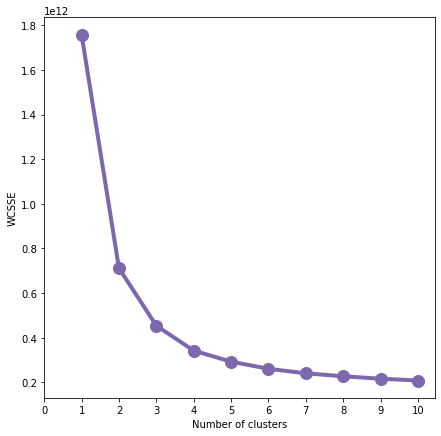

In [32]:
WCSS = []
for i in tqdm(range(1,11)):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(dfThree)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = '#7D68AD')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSSE")
plt.show()

In [33]:
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
dfThree['cluster'] = model.fit_predict(dfThree)

In [34]:
dfThree

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,cluster
0,40841.745229,-11770.978527,-2060.457030,-10837.964865,-2506.428671,-4332.516781,-4640.882622,-323.947940,-846.870397,10692.285362,...,-5625.803497,-5888.304129,-1036.561829,-9350.632403,-4520.574778,-666.326798,7454.086049,-11102.299863,-10124.905900,1
1,22268.697250,-4723.957110,1580.102921,-6546.720648,635.750836,-2846.363289,-1405.076529,-2773.559031,-1019.016906,6522.314968,...,-2414.208078,-3483.476402,-432.495815,-5349.490638,-1884.367985,-1903.048045,3978.465194,-5198.278836,-2623.097328,0
2,41564.772320,-11848.600169,3755.456658,-12207.666779,1846.755124,-5413.140693,2044.232334,-456.037859,-2874.906454,7514.367017,...,-8494.068532,-9476.471666,-1083.751198,-8953.365917,-3158.911487,-4049.270376,6265.884181,-8509.116495,-6656.421002,1
3,44155.528632,-10363.973603,4637.679813,-11925.787050,942.595782,-3533.858033,-3847.858310,-655.876028,-536.662040,7492.043513,...,-8462.334276,-9905.149484,816.914225,-8491.304891,-3489.236127,-2979.815865,7862.023263,-9323.172466,-5161.498270,2
4,35258.256192,-10692.582420,2290.538271,-10556.427585,882.292160,-3820.498265,-843.867072,-2952.200507,-1189.018877,7516.800894,...,-5896.618287,-6956.793034,-1003.806626,-7513.801408,-2791.128173,-3204.373164,5442.169400,-7442.864639,-4425.411026,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,29622.636237,-7865.022968,2144.845955,-8101.318921,-131.859632,-2416.847328,-3474.796294,-675.899966,-296.396727,7050.192697,...,-5569.654443,-6276.565727,-558.600820,-6948.313159,-2990.188671,-1886.172989,5205.380176,-7033.918777,-866.452688,1
6771,41536.275606,-9829.882373,8346.355321,-12038.017405,303.887837,-4114.224996,-773.162771,1139.443476,36.507005,6861.837317,...,-11410.396214,-12177.411091,67.307345,-9178.283438,-3211.782102,-5123.345215,6550.015832,-7817.383788,3105.410911,1
6772,31861.713423,-9559.686001,830.175863,-8921.987461,-1774.136674,-2279.451009,-2880.042777,-56.125304,892.550323,6407.473223,...,-5964.199514,-6134.584905,-473.046006,-6246.808151,-2662.896958,-2299.017574,4679.521411,-7430.495155,-5058.062249,1
6773,15102.983473,-4819.156858,1398.502018,-4034.420524,532.853168,-1913.635457,160.237330,-623.038481,-1483.694678,3169.898626,...,-2814.125461,-3169.266656,-558.981300,-3678.167581,-1409.602626,-1138.648599,2420.122597,-3152.796195,-1940.680285,0


In [35]:
clust0Idx = []
clust1Idx = []
clust2Idx = []

for i in range(len(dfThree)):
    if dfThree.loc[i, 'cluster'] == 0:
        clust0Idx.append(i)
    elif dfThree.loc[i, 'cluster'] == 1:
        clust1Idx.append(i)
    else:
        clust2Idx.append(i)

In [36]:
def getAvgs(champList, c0Idx, c1Idx, c2Idx):
    tmpDF1 = finalDF.loc[c0Idx]
    dict1_info = {}
    for champ in champList:
        info = []
        sum_kill = 0
        sum_death = 0
        sum_assist = 0
        for i in tmpDF1.index:
            sum_kill = sum_kill + tmpDF1.loc[i, 'p' + str(idxDict[champ][i] + 1) + '_kill']
            sum_death = sum_death + tmpDF1.loc[i, 'p' + str(idxDict[champ][i] + 1) + '_death']
            sum_assist = sum_assist + tmpDF1.loc[i, 'p' + str(idxDict[champ][i] + 1) + '_assist']
            
        info.append(round(sum_kill / len(tmpDF1), 2))
        info.append(round(sum_death / len(tmpDF1), 2))
        info.append(round(sum_assist / len(tmpDF1), 2))
        #print(sum_kill)
        dict1_info[champ] = info
    avg1_kill = (sum(tmpDF1['p1_kill']) + sum(tmpDF1['p2_kill']) + sum(tmpDF1['p3_kill']) + sum(tmpDF1['p4_kill']) + sum(tmpDF1['p5_kill'])) / (len(tmpDF1) * 5)
    avg1_death = (sum(tmpDF1['p1_death']) + sum(tmpDF1['p2_death']) + sum(tmpDF1['p3_death']) + sum(tmpDF1['p4_death']) + sum(tmpDF1['p5_death'])) / (len(tmpDF1) * 5)
    avg1_assist = (sum(tmpDF1['p1_assist']) + sum(tmpDF1['p2_assist']) + sum(tmpDF1['p3_assist']) + sum(tmpDF1['p4_assist']) + sum(tmpDF1['p5_assist'])) / (len(tmpDF1) * 5)
    dict1_info['all'] = [round(avg1_kill, 2), round(avg1_death, 2), round(avg1_assist, 2)]
    dict1_info['winRate'] = round(sum(tmpDF1['winLose']) / len(tmpDF1) * 100, 2)
    
    tmpDF2 = finalDF.loc[c1Idx]
    dict2_info = {}
    for champ in champList:
        info = []
        sum_kill = 0
        sum_death = 0
        sum_assist = 0
        for i in tmpDF2.index:
            sum_kill = sum_kill + tmpDF2.loc[i, 'p' + str(idxDict[champ][i] + 1) + '_kill']
            sum_death = sum_death + tmpDF2.loc[i, 'p' + str(idxDict[champ][i] + 1) + '_death']
            sum_assist = sum_assist + tmpDF2.loc[i, 'p' + str(idxDict[champ][i] + 1) + '_assist']
            
        info.append(round(sum_kill / len(tmpDF2), 2))
        info.append(round(sum_death / len(tmpDF2), 2))
        info.append(round(sum_assist / len(tmpDF2), 2))
        #print(sum_kill)
        dict2_info[champ] = info
    avg2_kill = (sum(tmpDF2['p1_kill']) + sum(tmpDF2['p2_kill']) + sum(tmpDF2['p3_kill']) + sum(tmpDF2['p4_kill']) + sum(tmpDF2['p5_kill'])) / (len(tmpDF1) * 5)
    avg2_death = (sum(tmpDF2['p1_death']) + sum(tmpDF2['p2_death']) + sum(tmpDF2['p3_death']) + sum(tmpDF2['p4_death']) + sum(tmpDF2['p5_death'])) / (len(tmpDF1) * 5)
    avg2_assist = (sum(tmpDF2['p1_assist']) + sum(tmpDF2['p2_assist']) + sum(tmpDF2['p3_assist']) + sum(tmpDF2['p4_assist']) + sum(tmpDF2['p5_assist'])) / (len(tmpDF1) * 5)
    dict2_info['all'] = [round(avg2_kill, 2), round(avg2_death, 2), round(avg2_assist, 2)]
    dict2_info['winRate'] = round(sum(tmpDF2['winLose']) / len(tmpDF2) * 100, 2)
    
    tmpDF3 = finalDF.loc[c2Idx]
    dict3_info = {}
    for champ in champList:
        info = []
        sum_kill = 0
        sum_death = 0
        sum_assist = 0
        for i in tmpDF3.index:
            sum_kill = sum_kill + tmpDF3.loc[i, 'p' + str(idxDict[champ][i] + 1) + '_kill']
            sum_death = sum_death + tmpDF3.loc[i, 'p' + str(idxDict[champ][i] + 1) + '_death']
            sum_assist = sum_assist + tmpDF3.loc[i, 'p' + str(idxDict[champ][i] + 1) + '_assist']
            
        info.append(round(sum_kill / len(tmpDF3), 2))
        info.append(round(sum_death / len(tmpDF3), 2))
        info.append(round(sum_assist / len(tmpDF3), 2))
        #print(sum_kill)
        dict3_info[champ] = info
    avg3_kill = (sum(tmpDF3['p1_kill']) + sum(tmpDF3['p2_kill']) + sum(tmpDF3['p3_kill']) + sum(tmpDF3['p4_kill']) + sum(tmpDF3['p5_kill'])) / (len(tmpDF3) * 5)
    avg3_death = (sum(tmpDF3['p1_death']) + sum(tmpDF3['p2_death']) + sum(tmpDF3['p3_death']) + sum(tmpDF3['p4_death']) + sum(tmpDF3['p5_death'])) / (len(tmpDF3) * 5)
    avg3_assist = (sum(tmpDF3['p1_assist']) + sum(tmpDF3['p2_assist']) + sum(tmpDF3['p3_assist']) + sum(tmpDF3['p4_assist']) + sum(tmpDF3['p5_assist'])) / (len(tmpDF3) * 5)
    dict3_info['all'] = [round(avg3_kill, 2), round(avg3_death, 2), round(avg3_assist, 2)]
    dict3_info['winRate'] = round(sum(tmpDF3['winLose']) / len(tmpDF3) * 100, 2)
    
    return dict1_info, dict2_info, dict3_info

In [44]:
clust1, clust2, clust3 = getAvgs(champList, clust0Idx, clust1Idx, clust2Idx)

In [45]:
clust1

{'fiora': [2.45, 3.2, 1.87], 'all': [3.04, 3.39, 3.96], 'winRate': 48.78}

In [46]:
clust2

{'fiora': [4.44, 4.87, 4.2], 'all': [5.05, 5.08, 7.74], 'winRate': 49.68}

In [47]:
clust3

{'fiora': [6.39, 6.4, 6.77], 'all': [6.69, 6.65, 11.21], 'winRate': 51.28}

In [48]:
sum1 = sum(clust1['all'])
sum2 = sum(clust2['all'])
sum3 = sum(clust3['all'])
print(sum1, sum2, sum3)
if sum1 > sum2 and sum2 > sum3:
    clust1['type'] = 'fight'
    clust2['type'] = 'normal'
    clust3['type'] = 'safe'
elif sum1 > sum3 and sum3 > sum2:
    clust1['type'] = 'fight'
    clust2['type'] = 'safe'
    clust3['type'] = 'normal'
elif sum2 > sum1 and sum1 > sum3:
    clust1['type'] = 'normal'
    clust2['type'] = 'fight'
    clust3['type'] = 'safe'
elif sum2 > sum3 and sum3 > sum1:
    clust1['type'] = 'safe'
    clust2['type'] = 'fight'
    clust3['type'] = 'normal'
elif sum3 > sum1 and sum1 > sum2:
    clust1['type'] = 'normal'
    clust2['type'] = 'safe'
    clust3['type'] = 'fight'
else:
    clust1['type'] = 'safe'
    clust2['type'] = 'normal'
    clust3['type'] = 'fight'

10.39 17.869999999999997 24.55


In [50]:
r1 = clust1['winRate']
r2 = clust2['winRate']
r3 = clust3['winRate']

recommend = ''
if r1 > r2 and r2 > r3:
    recommend = clust1['type'] + '->' + clust2['type'] + '->' + clust3['type']
elif r1 > r3 and r3 > r2:
    recommend = clust1['type'] + '->' + clust3['type'] + '->' + clust2['type']
elif r2 > r1 and r1 > r3:
    recommend = clust2['type'] + '->' + clust1['type'] + '->' + clust3['type']
elif r2 > r3 and r3 > r1:
    recommend = clust2['type'] + '->' + clust3['type'] + '->' + clust1['type']
elif r3 > r1 and r1 > r2:
    recommend = clust3['type'] + '->' + clust1['type'] + '->' + clust2['type']
else:
    recommend = clust3['type'] + '->' + clust2['type'] + '->' + clust1['type']
    
recommend

'fight->normal->safe'